<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [142]:
#!pip install pandas
!pip install seaborn

### Step 1: Import Required Libraries


In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [123]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [118]:
## Write your code here
subset = ['LearnCode','YearsCode','YearsCodePro','DevType','Country','LanguageHaveWorkedWith','LanguageWantToWorkWith']
count_dup_cols = df.duplicated(subset).value_counts()
print(count_dup_cols)

df[df.duplicated(subset)][subset].head(15)

False    61854
True      3583
Name: count, dtype: int64


,LearnCode,YearsCode,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith
6311,Books / Physical media;On the job training;Oth...,9,5,"Developer, full-stack",Argentina,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,Elixir;Erlang;Python;SQL
11521,NaN,NaN,NaN,NaN,United States of America,NaN,NaN
12569,NaN,NaN,NaN,NaN,United States of America,NaN,NaN
13364,On the job training;Other online resources (e....,2,1,"Developer, front-end",Ukraine,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript
16744,"Colleague;Other online resources (e.g., videos...",3,Less than 1 year,"Developer, full-stack",Ukraine,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
22817,"Other online resources (e.g., videos, blogs, f...",6,4,"Developer, front-end",Ukraine,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript
25311,Books / Physical media;Colleague;Other online ...,15,11,"Developer, back-end",Taiwan,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP
28848,NaN,NaN,NaN,NaN,United States of America,NaN,NaN
29547,Books / Physical media;Other online resources ...,12,8,"Developer, back-end",Ukraine,Java,Java
34022,NaN,NaN,NaN,NaN,United States of America,NaN,NaN


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [124]:
## Write your code here
df.drop_duplicates(subset, keep='first', inplace=True)
df.duplicated(subset).value_counts()

False    61854
Name: count, dtype: int64

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [125]:
## Write your code here
df.isna()
df['EdLevel'].replace(np.nan, df['EdLevel'].value_counts().idxmax(), inplace=True)
print(df['EdLevel'].isna().sum())

0


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [126]:
## Write your code here
df['ConvertedCompYearly'].isna().sum()
# Calculating the median of salary based on DevType,Country & YearsCodePro :
df['ConvertedCompYearly'] = df.groupby(['DevType','Country','YearsCodePro'])['ConvertedCompYearly'].transform(lambda x: x.fillna(x.median()))

# Calculating the median of salary based on Country to fill the rest of the NaN :
df['ConvertedCompYearly'] = df.groupby('Country')['ConvertedCompYearly'].transform(
    lambda x: x.fillna(x.median())
)

# Dropping the rest of the NaNs :
df.dropna(subset=['ConvertedCompYearly'], inplace=True)
print(df['ConvertedCompYearly'].isna().sum())

0


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [137]:
## Write your code here
na_dev = df[['DevType']].isna().sum()
na_exp = df[['YearsCodePro']].isna().sum()
na_lang = df[['LanguageHaveWorkedWith']].isna().sum()
print('Before DevType : ', na_dev)
print('Before YearsCodePro : ', na_exp)
print('Before LanguageHaveWorkedWith : ', na_lang)
df[['Age', 'DevType', 'YearsCodePro']]
df[['Age', 'DevType','LanguageHaveWorkedWith']]
#-------------------------------------------------------------------------
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
})

df.loc[df['Age'] == 'Under 18 years old', 'YearsCodePro'] = 0

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'] = df.groupby(['DevType','Country'])['YearsCodePro'].transform(lambda x: x.fillna(x.median()))
df['YearsCodePro'].fillna(df['YearsCodePro'].median(), inplace=True)
print('After YearsCodePro : ', df['YearsCodePro'].isna().sum())
#-------------------------------------------------------------------------
df['LanguageHaveWorkedWith'] = df.groupby(['DevType','Country'])['LanguageHaveWorkedWith'] \
    .transform(lambda x: x.fillna(x.value_counts().idxmax() if not x.value_counts().empty else 'Other'))

df['LanguageHaveWorkedWith'].fillna('Other', inplace=True)
print('After LanguageHaveWorkedWith : ', df['LanguageHaveWorkedWith'].isna().sum())
#-------------------------------------------------------------------------
df.loc[df['Age'] == 'Under 18 years old', 'DevType'] = ''

df['DevType'] = df.groupby(['LanguageHaveWorkedWith','Country'])['DevType'] \
                  .transform(lambda x: x.fillna(x.value_counts().idxmax() if not x.value_counts().empty else 'Other'))

df['DevType'].fillna('Other', inplace=True)
print('After YearsCodePro : ', df['YearsCodePro'].isna().sum())

Before DevType :  DevType    590
dtype: int64
Before YearsCodePro :  YearsCodePro    0
dtype: int64
Before LanguageHaveWorkedWith :  LanguageHaveWorkedWith    0
dtype: int64
After YearsCodePro :  0
After LanguageHaveWorkedWith :  0
After YearsCodePro :  0


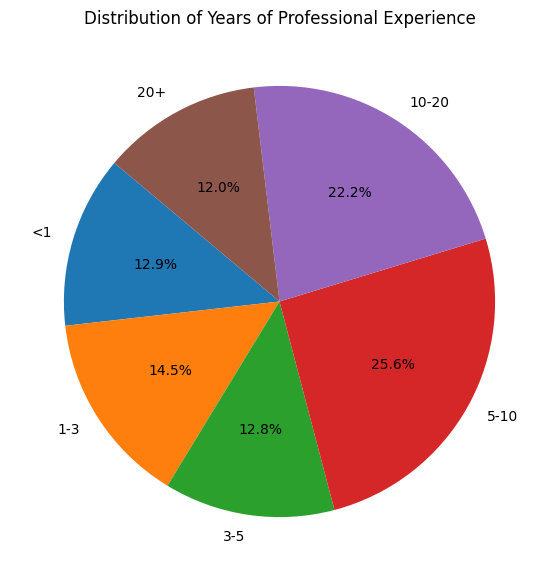

In [153]:
import matplotlib.pyplot as plt

# Filtrer les >=18 ans
df_exp = df[df['Age'] != 'Under 18 years old'].copy()

# Catégoriser les années d'expérience
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1','1-3','3-5','5-10','10-20','20+']
df_exp['YearsExpRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Pie chart
exp_counts = df_exp['YearsExpRange'].value_counts().sort_index()
plt.figure(figsize=(7,7))
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Years of Professional Experience")
plt.show()


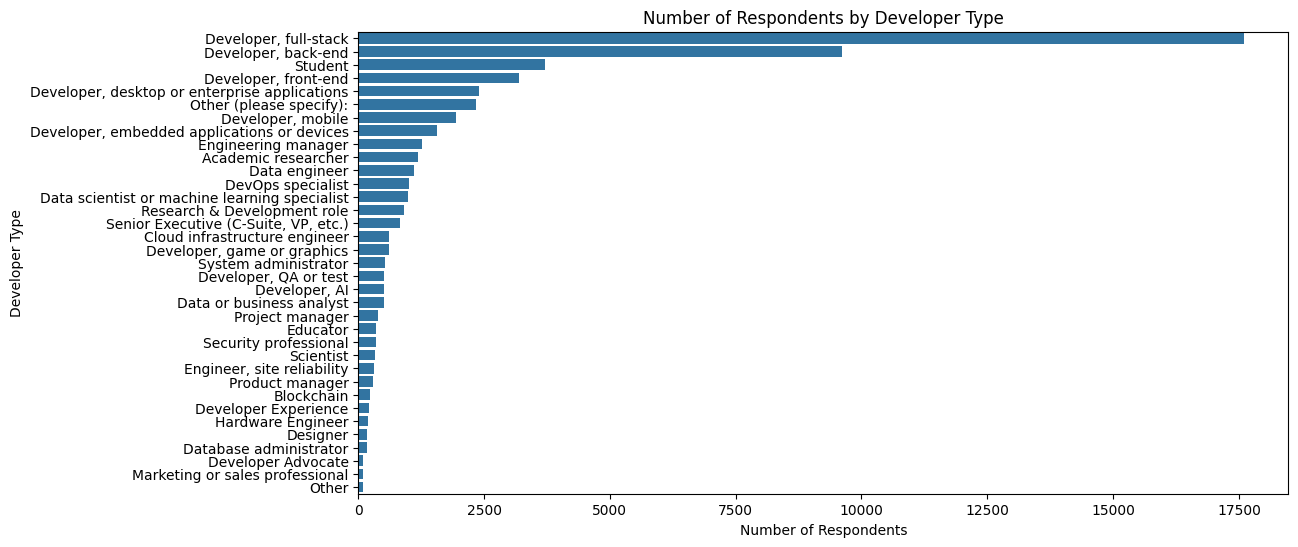

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les >=18 ans et DevType non vide
df_dev = df[(df['Age'] != 'Under 18 years old') & (df['DevType'] != '')].copy()

plt.figure(figsize=(12,6))
sns.countplot(data=df_dev, y='DevType', order=df_dev['DevType'].value_counts().index)
plt.title('Number of Respondents by Developer Type')
plt.xlabel('Number of Respondents')
plt.ylabel('Developer Type')
plt.show()


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
